<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [14]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, y

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
x_val = x_train[:10000] # 검증 데이터
partial_x_train = x_train[10000:] # 훈련 데이터
y_val = y_train[:10000] # 검증 label
partial_y_train = y_train[10000:] # 훈련 label

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5267 - acc: 0.7721 - val_loss: 0.3889 - val_acc: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3079 - acc: 0.9015 - val_loss: 0.3021 - val_acc: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2236 - acc: 0.9267 - val_loss: 0.2795 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1772 - acc: 0.9417 - val_loss: 0.2753 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1421 - acc: 0.9556 - val_loss: 0.2801 - val_acc: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1181 - acc: 0.9631 - val_loss: 0.2929 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0967 - acc: 0.9699 - val_loss: 0.3245 - val_acc: 0.8818
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0789 - a

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
acc = history_dict['acc']

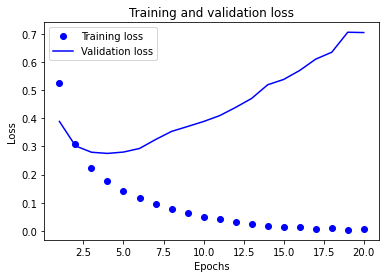

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

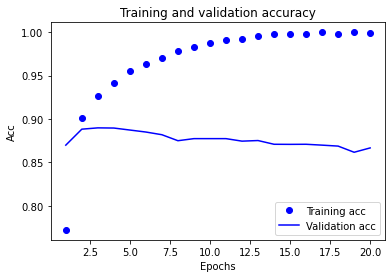

In [23]:
plt.clf() # 생성한 그래프를 clear
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.4580 - accuracy: 0.8160
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2604 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1995 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2998 - accuracy: 0.8817


In [25]:
results

[0.2997910678386688, 0.8817200064659119]

In [26]:
model.predict(x_test)

array([[0.22335282],
       [0.9999785 ],
       [0.9375947 ],
       ...,
       [0.15955004],
       [0.078895  ],
       [0.7772764 ]], dtype=float32)